# Testing queries

### Libraries

In [1]:
%cd ..

c:\ulb\SearchEngines_benchmark


c:\ulb\SearchEngines_benchmark\venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
from src.queries import * #this import all the queries we want to test
import pyodbc
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

### Connect to data base

In [3]:
# Connect to SQL Server
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                      'SERVER=localhost,1433;'
                      'DATABASE=StackOverflowMini;'
                      'UID=sa;'
                      'PWD=<YourStrong@Passw0rd>')
cursor = conn.cursor()

### Executing queries test
This first step measures performance when extracting the whole table.

In [ ]:
# Initialize a list to hold query metrics
query_metrics = []

# Run benchmarks
for i in range(0,len(query_dictionary['query'])):
    query = query_dictionary['query'][i]
    query_id = query_dictionary['id'][i]
#for query in queries:
    print(f"Executing: {query}")
    start_time = time.time()
    cursor.execute(query)
    results = cursor.fetchall()
    end_time = time.time()
    
    # Collect execution time
    execution_time = end_time - start_time
    
    # Get number of rows and columns
    columns = [column[0] for column in cursor.description]  # Get column names
    num_rows = len(results)
    num_columns = len(columns)
    
    # Append metrics to the list
    query_metrics.append({
        'query_id':query_id,
        'query': query,
        'execution_time': execution_time,
        'num_rows': num_rows,
        'num_columns': num_columns
    })

# Convert to pandas DataFrame

df = pd.DataFrame(query_metrics)

Executing: 
select * from dbo.Comments;

Executing: 
select * from dbo.Badges;

Executing: 
select * from dbo.LinkTypes;

Executing: 
select * from dbo.PostLinks

Executing: 
select * from dbo.Posts



In [ ]:
df

,query_id,query,execution_time,num_rows,num_columns
0,1,\nselect * from dbo.Comments;\n,8.281559,1373756,6
1,2,\nselect * from dbo.Badges;\n,1.440678,444073,4
2,3,\nselect * from dbo.LinkTypes;\n,0.038941,2,2
3,4,\nselect * from dbo.PostLinks\n,0.006177,0,5
4,5,\nselect * from dbo.Posts\n,32.443844,1565425,20
5,6,\nselect * from dbo.PostTypes\n,2.859094,8,2
6,7,\nselect * from dbo.Users\n,0.763926,99869,14
7,8,\nselect * from dbo.Votes\n,11.058313,4614189,6
8,9,\nselect * from dbo.VoteTypes\n,0.315149,15,2
9,10,\nSELECT \n CASE\n WHEN Text LIKE '%...,28.194006,7,2


## Visualization of results

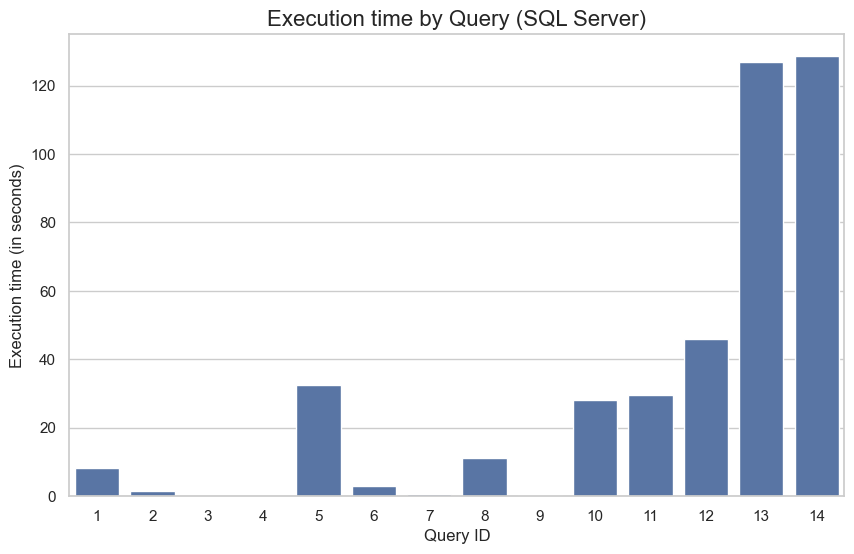

In [ ]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
sns.barplot(data=df, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (SQL Server)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (in seconds)", fontsize=12)
# Show the plot
plt.show()

## Saving results

In [18]:
now = datetime.datetime.now()
formatted_time = now.strftime("%Y_%m_%d_%H_%M")

In [19]:
df.to_csv(f'results/simple_test_{formatted_time}.csv')

## Trying some queries

In [4]:
print(query_prog_lang_user_posts)


SELECT
    OwnerUserId,
    CASE
        WHEN Body LIKE '%sql%' THEN 'SQL'
        WHEN Body LIKE '%python%' THEN 'Python'
        WHEN Body LIKE '% R %' THEN 'R'
        WHEN Body LIKE '%java%' THEN 'Java'
        WHEN Body LIKE '%javascript%' THEN 'JavaScript'
        WHEN Body LIKE '%c++%' THEN 'C++'
        WHEN Body LIKE '%ruby%' THEN 'Ruby'
        WHEN Body LIKE '%php%' THEN 'PHP'
        ELSE 'Other'
    END AS Programming_Language,
    COUNT(*) AS Post_Count
FROM 
    posts p
WHERE 
    Body LIKE '%sql%' 
    OR Body LIKE '%python%' 
    OR Body LIKE '% R %'
    OR Body LIKE '%java%' 
    OR Body LIKE '%javascript%' 
    OR Body LIKE '%c++%' 
    OR Body LIKE '%ruby%' 
    OR Body LIKE '%php%' 
GROUP BY
    OwnerUserId,
    CASE
        WHEN Body LIKE '%sql%' THEN 'SQL'
        WHEN Body LIKE '%python%' THEN 'Python'
        WHEN Body LIKE '% R %' THEN 'R'
        WHEN Body LIKE '%java%' THEN 'Java'
        WHEN Body LIKE '%javascript%' THEN 'JavaScript'
        WHEN Body LIK

In [5]:
df_user_post = pd.read_sql_query(query_prog_lang_user_posts,conn)

C:\Users\jidsc\AppData\Local\Temp\ipykernel_28724\568825530.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_user_post = pd.read_sql_query(query_prog_lang_user_posts,conn)


In [6]:
df_user_post.OwnerUserId.nunique()

51106

In [8]:
df_user_post.sort_values(by='OwnerUserId')

,OwnerUserId,Programming_Language,Post_Count
94080,0,Java,6259
94078,0,PHP,2843
94077,0,C++,2284
94076,0,Python,1538
94064,0,Ruby,527
...,...,...,...
44156,6258565,PHP,1
54754,7793848,SQL,2
36339,7955649,SQL,1
36150,8521238,Java,1


In [ ]:
df_user_post